In [ ]:
import pandas as pd  # Importing the pandas library for data manipulation
import matplotlib.pyplot as plt  # Importing the matplotlib library for data visualization
import seaborn as sns  # Importing the seaborn library for enhanced visualizations
from sklearn.model_selection import train_test_split  # Importing train_test_split function for data splitting
from sklearn.preprocessing import StandardScaler, PolynomialFeatures  # Importing StandardScaler and PolynomialFeatures for data preprocessing
from sklearn.ensemble import IsolationForest  # Importing IsolationForest for outlier analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # Importing LinearDiscriminantAnalysis for LDA
from sklearn.linear_model import LinearRegression  # Importing LinearRegression for linear regression
from sklearn.tree import DecisionTreeClassifier  # Importing DecisionTreeClassifier for decision tree classification
from sklearn.metrics import accuracy_score  # Importing accuracy_score for evaluating model performance


In [ ]:
# Load the dataset
data = pd.read_csv('/content/parkinsons.csv')

In [ ]:
data.head(2)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674


In [ ]:
data.shape

(195, 24)

In [ ]:
# Separate features and target variable
X = data.drop(['name', 'status'], axis=1)
y = data['status']

In [ ]:
X.shape

(195, 22)

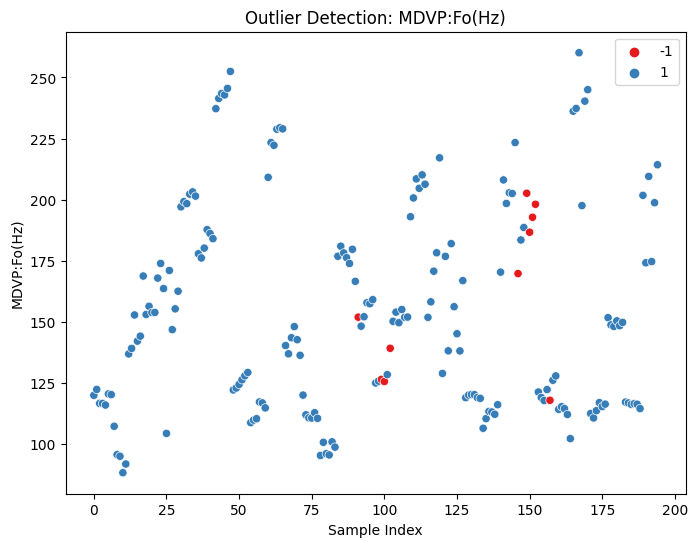

In [ ]:
# Visualize Outlier Detection
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X.index, y=X['MDVP:Fo(Hz)'], hue=outliers, palette='Set1')
plt.xlabel('Sample Index')
plt.ylabel('MDVP:Fo(Hz)')
plt.title('Outlier Detection: MDVP:Fo(Hz)')
plt.show()

In [ ]:
# Outlier Analysis
outlier_detector = IsolationForest(contamination=0.05)  # Creating an Isolation Forest outlier detector
outlier_detector.fit(X)  # Fitting the outlier detector on the features
outliers = outlier_detector.predict(X)  # Predicting outliers in the features
X_no_outliers= X[outliers == 1]  # Keeping only the non-outlier samples
y_no_outliers = y[outliers == 1]  # Keeping only the corresponding target variable

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
X_no_outliers.shape #outliers removed

(185, 22)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

In [ ]:
# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Apply polynomial feature engineering
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [ ]:
# Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis()  # Creating an LDA classifier
lda.fit(X_train_scaled, y_train)  # Fitting the LDA classifier on the training data
y_pred_lda = lda.predict(X_test_scaled)  # Making predictions using the LDA classifier
accuracy_lda = accuracy_score(y_test, y_pred_lda)  # Calculating accuracy of LDA predictions
print("LDA Accuracy:", accuracy_lda)

# Linear Regression
linear_reg = LinearRegression()  # Creating a Linear Regression model
linear_reg.fit(X_train_scaled, y_train)  # Fitting the Linear Regression model on the training data
y_pred_linear = linear_reg.predict(X_test_scaled)  # Making predictions using the Linear Regression model
y_pred_linear = [1 if val >= 0.5 else 0 for val in y_pred_linear]  # Converting predictions to binary values
accuracy_linear = accuracy_score(y_test, y_pred_linear)  # Calculating accuracy of Linear Regression predictions
print("Linear Regression Accuracy:", accuracy_linear)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()  # Creating a Decision Tree Classifier
dt_classifier.fit(X_train_poly, y_train)  # Fitting the Decision Tree Classifier on the polynomial features
y_pred_dt = dt_classifier.predict(X_test_poly)  # Making predictions using the Decision Tree Classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)  # Calculating accuracy of Decision Tree predictions
print("Decision Tree Accuracy:", accuracy_dt)

LDA Accuracy: 0.8648648648648649
Linear Regression Accuracy: 0.8918918918918919
Decision Tree Accuracy: 0.8108108108108109


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Create a list of model names and their corresponding accuracies
models = ['LDA', 'Linear Regression', 'Decision Tree']
accuracies = [accuracy_lda, accuracy_linear, accuracy_dt]
# Calculate the number of models
num_models = len(models)
# Create an array of angles for the radar plot
angles = np.linspace(0, 2 * np.pi, num_models, endpoint=False).tolist()
angles += angles[:1]  # Close the plot by repeating the first angle
# Convert the accuracies to a circular format
circular_accuracies = accuracies + [accuracies[0]]
# Create a figure and axis for the radar plot
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw={'polar': True})
# Plot the radar plot
ax.plot(angles, circular_accuracies, 'o-', linewidth=2)
# Set the labels for each axis
ax.set_xticks(angles[:-1])
ax.set_xticklabels(models)
# Set the y-axis limit based on the maximum accuracy
max_accuracy = max(accuracies)
ax.set_ylim(0, max_accuracy + 0.1)
# Set the title and gridlines
ax.set_title('Accuracy Comparison', pad=20)
ax.grid(True)
# Display the radar plot
plt.show()